# Load the CSV file

In [2]:
# Load library
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Create path from .csv file
path = 'Group3_missing_value.csv'

# Load dataset
dataframe = pd.read_csv(path)

# Rearrange columns
dataframe = dataframe.reindex(columns = ['Condition', 'Cylinder heating zone 1', 'Cylinder heating zone 2', 'Cylinder heating zone 3', 'Cylinder heating zone 4', 'Cylinder heating zone 5', 'Maximum injection pressure', 'Mould temperature control unit 1', 'Cycle time', 'Injection time', 'Dosage time', 'Switch-over volume', 'Material cushion'])

#Display everything
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)

## Question 1 (Understand The Data)

1a) In Total, how many records and parameters?

In [3]:
#Checking for records and parameters 
num_rows, num_col = dataframe.shape

#Intially there is 111 Records and 12 parameters(excluding the 'condition' column as it it an output)
print('There are', num_rows, 'records and', num_col-1, 'parameters.')

There are 111 records and 12 parameters.


____
1b) Is this a classification or regression issue?

    This is a classification.

____
1c) How many different classes in the data?

    3 different class: Normal1, Condition1 and Condition.

1d) How many records for each condition? 

In [4]:
#Checking the total records for each condition
classorder = ['Normal1', 'Condition1', 'Condition5']
dataframe['Condition'] = pd.Categorical(dataframe['Condition'], categories = classorder)

#Group by each condition and indicate the count for the condition 
rowcount = dataframe.groupby('Condition').size().reset_index(name = 'Count')
display(rowcount)

Condition  Count
0     Normal1     50
1  Condition1     27
2  Condition5     34

1e) How many null values for each condition under each parameter?

In [5]:
#Checking for each parameter and condition null value
groupcondition = dataframe.groupby('Condition')[dataframe.columns[1:]]

#Adding all the null value 
nullvalue = groupcondition.apply(lambda x: x.isnull().sum())

columncount = groupcondition.apply(lambda x: x.shape[1])
result = pd.concat([nullvalue]).reset_index()
result

Condition  Cylinder heating zone 1  Cylinder heating zone 2  \
0     Normal1                        2                        2   
1  Condition1                        2                        3   
2  Condition5                        2                        3   

   Cylinder heating zone 3  Cylinder heating zone 4  Cylinder heating zone 5  \
0                        2                        2                        2   
1                        2                        3                        2   
2                        3                        1                        2   

   Maximum injection pressure  Mould temperature control unit 1  Cycle time  \
0                           3                                 2           2   
1                           1                                 2           2   
2                           3                                 2           2   

   Injection time  Dosage time  Switch-over volume  Material cushion  
0               2            2                   2                 2  
1               2            2                   2                 2  
2               2            2                   2                 2

___
## Question 2 (Data Checking and Data Pre-Processing)

##   Data Checking
<span style="color: red;">Removing the outliers by using Box and Whisker </span>

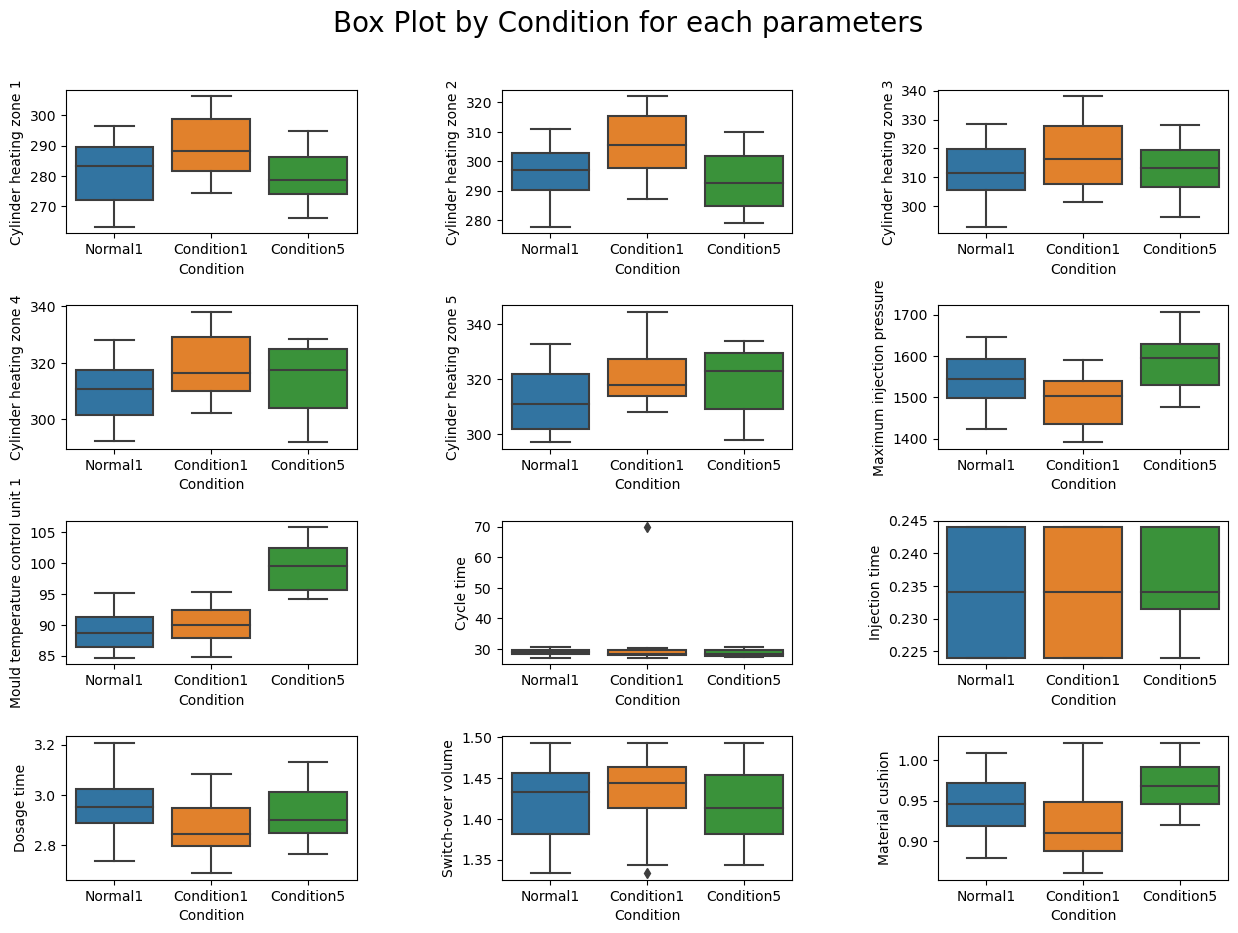

In [6]:
#Using Boxplot to check for outliers 
# Exclude the first column
columns = dataframe.columns[1:]

#To determine number of subplot 
num_rows, num_cols = 4, 3
#To adjust the figure size
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 10))

#Using for loop to plot the boxplot for each subplot 
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        col_index = i * num_cols + j 
        if col_index < len(columns):
            col = columns[col_index]
            
            #plot the box plot 
            sns.boxplot(ax = ax, data = dataframe, x = 'Condition', y = col)
    
fig.suptitle('Box Plot by Condition for each parameters', fontsize = 20)
plt.subplots_adjust(top = 0.9, hspace = 0.5, wspace = 0.5)
plt.show()

### Observation:
    So we notice that cycle time has one outlier, which will make a huge different in our mean, median and standard deviation. Hence, we need to drop that value.

#   Data Pre-Processing


<span style="color: red;">Cycle time has an outlier, so we drop it</span> 

In [7]:
#Dropping the outlier with Cycle time more than 40 
dfdrop = dataframe.drop(dataframe[dataframe['Cycle time'] > 40].index)

#Double checking if the outlier is dropped
#Row50 is dropped 
display(dfdrop)

Condition  Cylinder heating zone 1  Cylinder heating zone 2  \
0       Normal1                   282.86                   296.86   
1       Normal1                   295.22                   302.91   
2       Normal1                   292.08                   307.12   
3       Normal1                   274.11                   305.14   
4       Normal1                   264.64                   299.26   
5       Normal1                   286.20                   285.63   
6       Normal1                   273.03                   277.67   
7       Normal1                   288.35                   292.72   
8       Normal1                      NaN                      NaN   
9       Normal1                   266.70                   309.93   
10      Normal1                   264.87                   292.83   
11      Normal1                   276.03                   310.79   
12      Normal1                   267.46                   303.41   
13      Normal1                   273.54                   298.32   
14      Normal1                   293.27                   294.73   
15      Normal1                   287.39                   292.24   
16      Normal1                   293.15                   301.52   
17      Normal1                   289.33                   284.13   
18      Normal1                   291.84                   291.23   
19      Normal1                   263.80                   291.70   
20      Normal1                   291.93                   297.08   
21      Normal1                   288.38                   308.69   
22      Normal1                   267.02                   289.89   
23      Normal1                   286.26                   297.15   
24      Normal1                   273.94                   299.74   
25      Normal1                   281.71                   302.77   
26      Normal1                   283.84                   290.26   
27      Normal1                   285.12                   282.07   
28      Normal1                      NaN                   290.04   
29      Normal1                   275.86                   302.67   
30      Normal1                   263.21                      NaN   
31      Normal1                   264.16                   298.42   
32      Normal1                   282.02                   310.13   
33      Normal1                   293.98                   289.29   
34      Normal1                   266.84                   304.89   
35      Normal1                   291.48                   302.60   
36      Normal1                   295.57                   298.25   
37      Normal1                   283.39                   299.03   
38      Normal1                   296.35                   278.71   
39      Normal1                   290.71                   293.37   
40      Normal1                   292.39                   282.49   
41      Normal1                   283.47                   287.72   
42      Normal1                   272.37                   296.04   
43      Normal1                   271.16                   308.35   
44      Normal1                   265.35                   305.15   
45      Normal1                   278.96                   285.78   
46      Normal1                   283.89                   286.24   
47      Normal1                   289.32                   298.64   
48      Normal1                   278.48                   300.36   
49      Normal1                   270.77                   293.13   
51   Condition1                   279.73                   309.10   
52   Condition1                   299.17                   307.15   
53   Condition1                   305.15                   291.82   
54   Condition1                   288.30                   303.56   
55   Condition1                   293.94                      NaN   
56   Condition1                   280.62                   311.25   
57   Condition1                   298.89                   320.36   
58  

<span style="color: red;">Check the NEW Data of their total records and parameter</span> 

In [8]:
#Checking for records and parameters 
num_rows, num_col = dfdrop.shape
print('There are', num_rows, 'records and', num_col-1, 'parameters.')

There are 110 records and 12 parameters.


# REASONS why we use forward fill

<span style="color: red;">Fill in the NULL value for all 3 methods</span> 

In [9]:
#Fill in Backward Fill for Null
backfill = dfdrop.groupby(['Condition'], group_keys = False).apply(lambda x: x.fillna(method = 'bfill'))
#display(round(backfill, 6))

#Fill in Forward Fill for Null
forfill = dfdrop.groupby(['Condition'], group_keys = False).apply(lambda x: x.fillna(method = 'ffill'))
display(round(forfill, 6))

#Fill in avg for Null
avg = dfdrop.groupby(['Condition'], group_keys = False).apply(lambda x: x.fillna(x.mean()))
#display(round(avg, 6))

#Save to .csv
a = forfill.to_csv('Grp3-forwardfilleddata' + '.csv', index=False)
#Save to .excel
forfill.to_excel('Grp3-forwardfilleddata' + '.xlsx', index=False)
#display(forfill)

Condition  Cylinder heating zone 1  Cylinder heating zone 2  \
0       Normal1                   282.86                   296.86   
1       Normal1                   295.22                   302.91   
2       Normal1                   292.08                   307.12   
3       Normal1                   274.11                   305.14   
4       Normal1                   264.64                   299.26   
5       Normal1                   286.20                   285.63   
6       Normal1                   273.03                   277.67   
7       Normal1                   288.35                   292.72   
8       Normal1                   288.35                   292.72   
9       Normal1                   266.70                   309.93   
10      Normal1                   264.87                   292.83   
11      Normal1                   276.03                   310.79   
12      Normal1                   267.46                   303.41   
13      Normal1                   273.54                   298.32   
14      Normal1                   293.27                   294.73   
15      Normal1                   287.39                   292.24   
16      Normal1                   293.15                   301.52   
17      Normal1                   289.33                   284.13   
18      Normal1                   291.84                   291.23   
19      Normal1                   263.80                   291.70   
20      Normal1                   291.93                   297.08   
21      Normal1                   288.38                   308.69   
22      Normal1                   267.02                   289.89   
23      Normal1                   286.26                   297.15   
24      Normal1                   273.94                   299.74   
25      Normal1                   281.71                   302.77   
26      Normal1                   283.84                   290.26   
27      Normal1                   285.12                   282.07   
28      Normal1                   285.12                   290.04   
29      Normal1                   275.86                   302.67   
30      Normal1                   263.21                   302.67   
31      Normal1                   264.16                   298.42   
32      Normal1                   282.02                   310.13   
33      Normal1                   293.98                   289.29   
34      Normal1                   266.84                   304.89   
35      Normal1                   291.48                   302.60   
36      Normal1                   295.57                   298.25   
37      Normal1                   283.39                   299.03   
38      Normal1                   296.35                   278.71   
39      Normal1                   290.71                   293.37   
40      Normal1                   292.39                   282.49   
41      Normal1                   283.47                   287.72   
42      Normal1                   272.37                   296.04   
43      Normal1                   271.16                   308.35   
44      Normal1                   265.35                   305.15   
45      Normal1                   278.96                   285.78   
46      Normal1                   283.89                   286.24   
47      Normal1                   289.32                   298.64   
48      Normal1                   278.48                   300.36   
49      Normal1                   270.77                   293.13   
51   Condition1                   279.73                   309.10   
52   Condition1                   299.17                   307.15   
53   Condition1                   305.15                   291.82   
54   Condition1                   288.30                   303.56   
55   Condition1                   293.94                   303.56   
56   Condition1                   280.62                   311.25   
57   Condition1                   298.89                   320.36   
58  

C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\2240659042.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = dfdrop.groupby(['Condition'], group_keys = False).apply(lambda x: x.fillna(x.mean()))
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\2240659042.py:10: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  avg = dfdrop.groupby(['Condition'], group_keys = False).apply(lambda x: x.fillna(x.mean()))
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\2240659042.py:10: FutureWarning: The default value of numeric_only in Data

<span style="color: red;">Compare the result with STD --> Orginal VS the method filled up</span> 

In [10]:
#Reason to use forward fill due to forward fill value is the nearest to the raw dataset
#Hence this increase the accurate and decrease the STD

# std for Backward, forward and mean
b_std = backfill.groupby('Condition').std()
f_std = forfill.groupby('Condition').std()
mean_std = avg.groupby('Condition').std()
wo = dfdrop.groupby('Condition').std()

# Difference in std before filling up vs other 3 methods
backward = abs(wo - b_std)
forward = abs(wo - f_std)
mean = abs(wo - mean_std)

#Display all the difference 
print("Before filling the NULL value of STD VS Backwards fill of STD")
display(abs(backward))
print()
print("Before filling the NULL value of STD VS Forward fill of STD")
display(abs(forward))
print()
print("Before filling the NULL value of STD VS Mean fill of STD")
display(abs(mean))

Before filling the NULL value of STD VS Backwards fill of STD


Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                    0.010171                 0.051893   
Condition1                 0.272891                 0.369961   
Condition5                 0.144311                 0.227305   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                    0.001105                 0.063685   
Condition1                 0.564182                 0.343717   
Condition5                 0.282149                 0.088933   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                    0.220146                    0.981923   
Condition1                 0.445205                    1.209067   
Condition5                 0.032939                    1.943488   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                             0.006709    0.016148        0.000055   
Condition1                          0.043112    0.020767        0.000124   
Condition5                          0.161933    0.019722        0.000138   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1        0.001942            0.000281          0.000400  
Condition1     0.004296            0.000901          0.001310  
Condition5     0.002966            0.000345          0.000179


Before filling the NULL value of STD VS Forward fill of STD


Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                    0.141993                 0.110118   
Condition1                 0.056094                 0.041208   
Condition5                 0.079395                 0.264661   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                    0.119894                 0.158501   
Condition1                 0.270334                 0.443313   
Condition5                 0.017934                 0.177829   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                    0.155896                    0.050779   
Condition1                 0.125726                    0.551321   
Condition5                 0.333627                    0.943150   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                             0.026766    0.002558        0.000096   
Condition1                          0.056037    0.000917        0.000124   
Condition5                          0.010565    0.001851        0.000224   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1        0.002112            0.000939          0.000536  
Condition1     0.005511            0.001014          0.000887  
Condition5     0.002282            0.002090          0.000751


Before filling the NULL value of STD VS Mean fill of STD


Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                    0.216987                 0.175709   
Condition1                 0.391417                 0.650802   
Condition5                 0.261084                 0.476541   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                    0.197867                 0.216138   
Condition1                 0.479701                 0.679347   
Condition5                 0.410788                 0.181690   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                    0.233894                    1.890719   
Condition1                 0.429917                    1.214226   
Condition5                 0.372658                    2.992812   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                             0.057951    0.019888        0.000164   
Condition1                          0.133757    0.042473        0.000354   
Condition5                          0.115587    0.033588        0.000249   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1        0.002184            0.000984          0.000708  
Condition1     0.004088            0.001051          0.001697  
Condition5     0.003191            0.001347          0.000924

C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\4260989951.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis tick labels
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\4260989951.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis tick labels
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\4260989951.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis tick labels
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\4260989951.py:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis tick labels
C:\Users\Owner\AppData\Local\Temp\ipykernel_12704\4260989951.py:27: UserWarning: FixedFormat

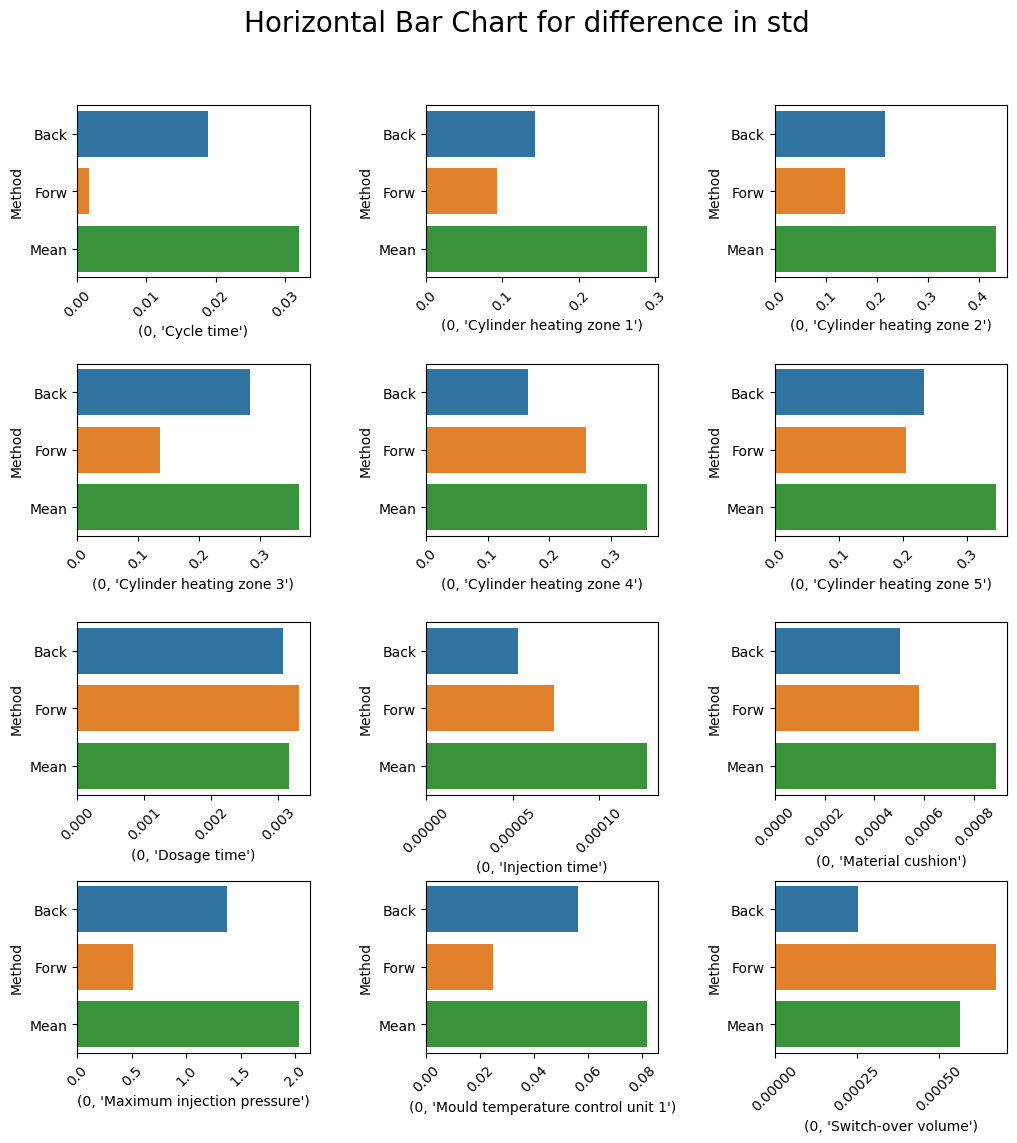

In [11]:
#Histogram chart
b = backward.mean()
f = forward.mean()
m = mean.mean()

con = pd.concat([b,f,m], keys = ['Back','Forw','Mean']).reset_index()
con
df_wide = con.pivot_table(index=['level_0'], columns='level_1')
df_wide

# Exclude the first column
columns = df_wide.columns[0:]
rows = df_wide.index[0:]

#Number of rows and columns for subplots
num_rows, num_cols = 4, 3
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(12, 12))

# Loop through the rows and columns to create subplots
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        col_index = i * num_cols + j  # Calculate the corresponding column index
        if col_index < len(columns):
            col = columns[col_index]
            pl = sns.barplot(ax=ax, data=df_wide, x=col, y=rows)
            ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis tick labels
            pl.set(ylabel = 'Method') 

fig.suptitle('Horizontal Bar Chart for difference in std', fontsize = 20)
plt.subplots_adjust(top=0.9, hspace=0.5, wspace=0.5)
plt.show()

### Observation:
    By using bar chart, we can determine the standard deviation for all 3different types of filling with the original data. In addition, the Bar Chart has identify that forward fill has a smaller standard deviation compared to others. 

___

# Import the Forward filled data 

In [12]:
#Reload the data file that we have processed
# Create path fro .csv file
ffill = 'Grp3-forwardfilleddata.csv'

# Load dataset
for_fill = pd.read_csv(ffill)

Double Checking the record, row and parameter

In [13]:
#Display the number of records and paramenters
num_rows, num_col = for_fill.shape
print('There are', num_rows, 'records and', num_col-1, 'parameters.')

#Incidate the count for each condition 
classorder = ['Normal1', 'Condition1', 'Condition5']
for_fill['Condition'] = pd.Categorical(for_fill['Condition'], categories = classorder)
rowcount = for_fill.groupby('Condition').size().reset_index(name = 'Count')
display(rowcount)

There are 110 records and 12 parameters.


Condition  Count
0     Normal1     50
1  Condition1     26
2  Condition5     34

___

## QUESTION 3 (Statistical Analysis of our DATA)

<span style="color: red;">Finding Mean and Median</span> 

In [14]:
for_fill_mean = for_fill.groupby('Condition').mean()
display(round(for_fill_mean,3))

Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                     280.905                  296.250   
Condition1                  288.728                  303.813   
Condition5                  280.475                  293.594   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                     311.502                  309.865   
Condition1                  319.365                  321.213   
Condition5                  313.559                  314.357   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                     312.426                    1547.749   
Condition1                  321.911                    1484.776   
Condition5                  319.224                    1585.444   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                               88.889      28.953           0.235   
Condition1                            90.029      28.630           0.232   
Condition5                            99.514      28.688           0.235   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1           2.945               1.425             0.945  
Condition1        2.862               1.434             0.912  
Condition5        2.928               1.413             0.968

In [15]:
for_fill_median = for_fill.groupby('Condition').median()
display(round(for_fill_median,3))

Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                      283.43                  297.115   
Condition1                   285.33                  303.560   
Condition5                   280.18                  292.140   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                     311.295                  310.320   
Condition1                  319.910                  321.285   
Condition5                  314.620                  316.855   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                     311.145                    1547.390   
Condition1                  318.340                    1490.915   
Condition5                  322.995                    1602.040   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                               88.655      28.993           0.234   
Condition1                            90.150      28.358           0.234   
Condition5                            99.650      28.367           0.234   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1           2.947               1.433             0.946  
Condition1        2.842               1.443             0.904  
Condition5        2.898               1.413             0.968

### Observation:
    The mean and median is to determine the skewed distribution.

___
<span style="color: red;">Finding Range</span> 

In [16]:
#To find the range for each parameter & condition
range_forfill = for_fill.groupby('Condition').aggregate(lambda x: x.max() - x.min())
display(round(range_forfill,3))

Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                       33.14                    33.12   
Condition1                    31.84                    35.02   
Condition5                    28.57                    31.20   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                       35.66                    35.85   
Condition1                    36.53                    35.80   
Condition5                    31.88                    36.60   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                       35.84                      222.55   
Condition1                    36.34                      198.29   
Condition5                    35.67                      229.89   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                                10.47       3.352            0.02   
Condition1                             10.62       3.322            0.02   
Condition5                             11.69       3.326            0.02   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1           0.472                0.16             0.129  
Condition1        0.366                0.16             0.160  
Condition5        0.366                0.15             0.102

### Observation:
    The range is to find the difference between maximum value and minimum value.

___
<span style="color: red;">Finding standard deviation</span>

In [17]:
#To find the standard deviation for each parameter & condition
std_forfill = for_fill.groupby('Condition').std()
display(round(std_forfill,3))

Cylinder heating zone 1  Cylinder heating zone 2  \
Condition                                                      
Normal1                      10.381                    8.411   
Condition1                    9.530                   10.470   
Condition5                    8.563                   10.505   

            Cylinder heating zone 3  Cylinder heating zone 4  \
Condition                                                      
Normal1                       9.476                   10.323   
Condition1                   11.477                   11.415   
Condition5                    8.809                   11.722   

            Cylinder heating zone 5  Maximum injection pressure  \
Condition                                                         
Normal1                      11.187                      60.854   
Condition1                   10.403                      60.649   
Condition5                   12.442                      65.253   

            Mould temperature control unit 1  Cycle time  Injection time  \
Condition                                                                  
Normal1                                2.784       0.962           0.008   
Condition1                             3.332       1.041           0.009   
Condition5                             3.766       1.090           0.008   

            Dosage time  Switch-over volume  Material cushion  
Condition                                                      
Normal1           0.108               0.047             0.034  
Condition1        0.106               0.051             0.042  
Condition5        0.106               0.046             0.029

### Observation:
    The standard deviation is to determine how spread out is the dataset for each parameter. The higher the value, the wider it is.

___
<span style="color: red;">Finding mean, max, std, Q1, Q2, Q3 </span> 

In [18]:
#Summary of all above statistic in one table
allstats = for_fill.groupby('Condition').describe()
display(round(allstats,3))

Cylinder heating zone 1                                            \
                             count     mean     std     min      25%     50%   
Condition                                                                      
Normal1                       50.0  280.905  10.381  263.21  272.535  283.43   
Condition1                    26.0  288.728   9.530  274.46  281.212  285.33   
Condition5                    34.0  280.475   8.563  266.10  274.273  280.18   

                            Cylinder heating zone 2                           \
                75%     max                   count     mean     std     min   
Condition                                                                      
Normal1     289.328  296.35                    50.0  296.250   8.411  277.67   
Condition1  295.850  306.30                    26.0  303.813  10.470  287.04   
Condition5  288.420  294.67                    34.0  293.594  10.505  278.81   

                                              Cylinder heating zone 3  \
                25%      50%      75%     max                   count   
Condition                                                               
Normal1     290.502  297.115  302.670  310.79                    50.0   
Condition1  295.393  303.560  310.712  322.06                    26.0   
Condition5  283.768  292.140  302.335  310.01                    34.0   

                                                                        \
               mean     std     min      25%      50%      75%     max   
Condition                                                                
Normal1     311.502   9.476  292.86  305.385  311.295  319.810  328.52   
Condition1  319.365  11.477  301.54  310.270  319.910  328.410  338.07   
Condition5  313.559   8.809  296.18  307.518  314.620  319.982  328.06   

           Cylinder heating zone 4                                             \
                             count     mean     std     min      25%      50%   
Condition                                                                       
Normal1                       50.0  309.865  10.323  292.26  301.885  310.320   
Condition1                    26.0  321.213  11.415  302.25  310.262  321.285   
Condition5                    34.0  314.357  11.722  291.88  304.948  316.855   

                            Cylinder heating zone 5                           \
                75%     max                   count     mean     std     min   
Condition                                                                      
Normal1     316.995  328.11                    50.0  312.426  11.187  297.16   
Condition1  330.318  338.05                    26.0  321.911  10.403  308.22   
Condition5  324.455  328.48                    34.0  319.224  12.442  298.15   

                                              Maximum injection pressure  \
                25%      50%      75%     max                      count   
Condition                                                                  
Normal1     302.032  311.145  321.625  333.00                       50.0   
Condition1  314.215  318.340  327.742  344.56                       26.0   
Condition5  307.628  322.995  329.870  333.82                       34.0   

                                                                              \
                mean     std      min       25%       50%       75%      max   
Condition                                                                      
Normal1     1547.749  60.854  1423.64  1499.992  1547.390  1593.192  1646.19   
Condition1  1484.776  60.649  1390.87  1424.840  1490.915  1531.972  1589.16   
Condition5  1585.444  65.253  1477.23  1536.788  1602.040  1631.630  1707.12   

           Mould temperature control unit 1                                \
                                      count    mean    std    min     25%   
Condition                                                                   
Normal1                     

### Observation:
    This a summary statistic can determine IQR, mean, max, median.

___
<span style="color: red;">Using boxplot to determine normal distribution / positive or negative skewed </span>

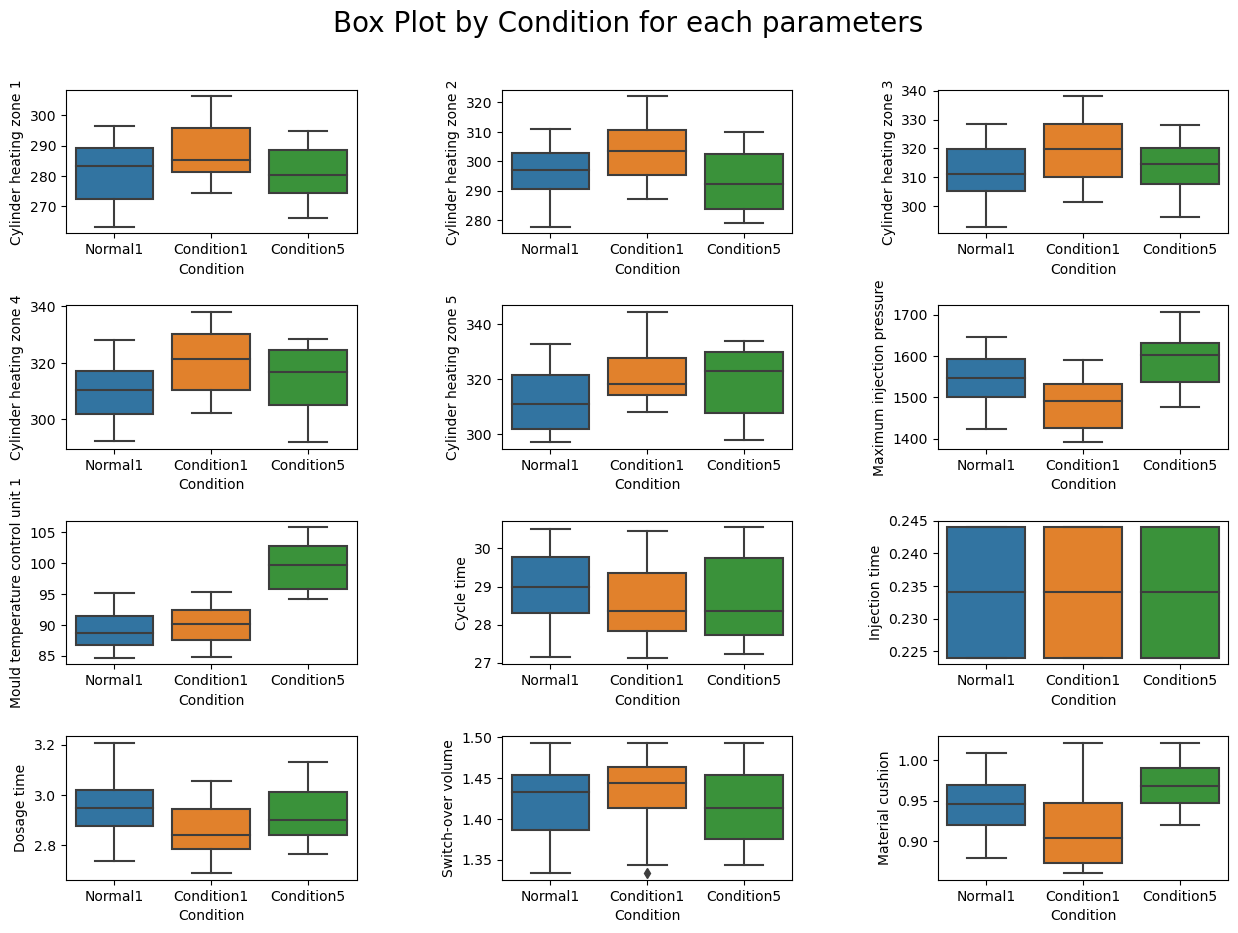

In [19]:
#Histogram
dfbox = pd.DataFrame(for_fill)
columns = dfbox.columns[1:]

#To determine number of subplot 
num_rows, num_cols = 4, 3
#Adjust the figure size
fig, axes = plt.subplots(nrows = num_rows, ncols = num_cols, figsize = (15, 10))

#For plotting the boxplot into the subplot 
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        col_index = i * num_cols + j 
        if col_index < len(columns):
            col = columns[col_index]
            sns.boxplot(ax = ax, data = for_fill, x = 'Condition', y = col)

fig.suptitle('Box Plot by Condition for each parameters', fontsize = 20)
plt.subplots_adjust(top = 0.9, hspace = 0.5, wspace = 0.5)
plt.show()

### Observation 

    This Box Plot graph shown after removal of outlier for 'cycle time'.

___

<span style="color: red;">Histogram Chart with regression line</span> <br>

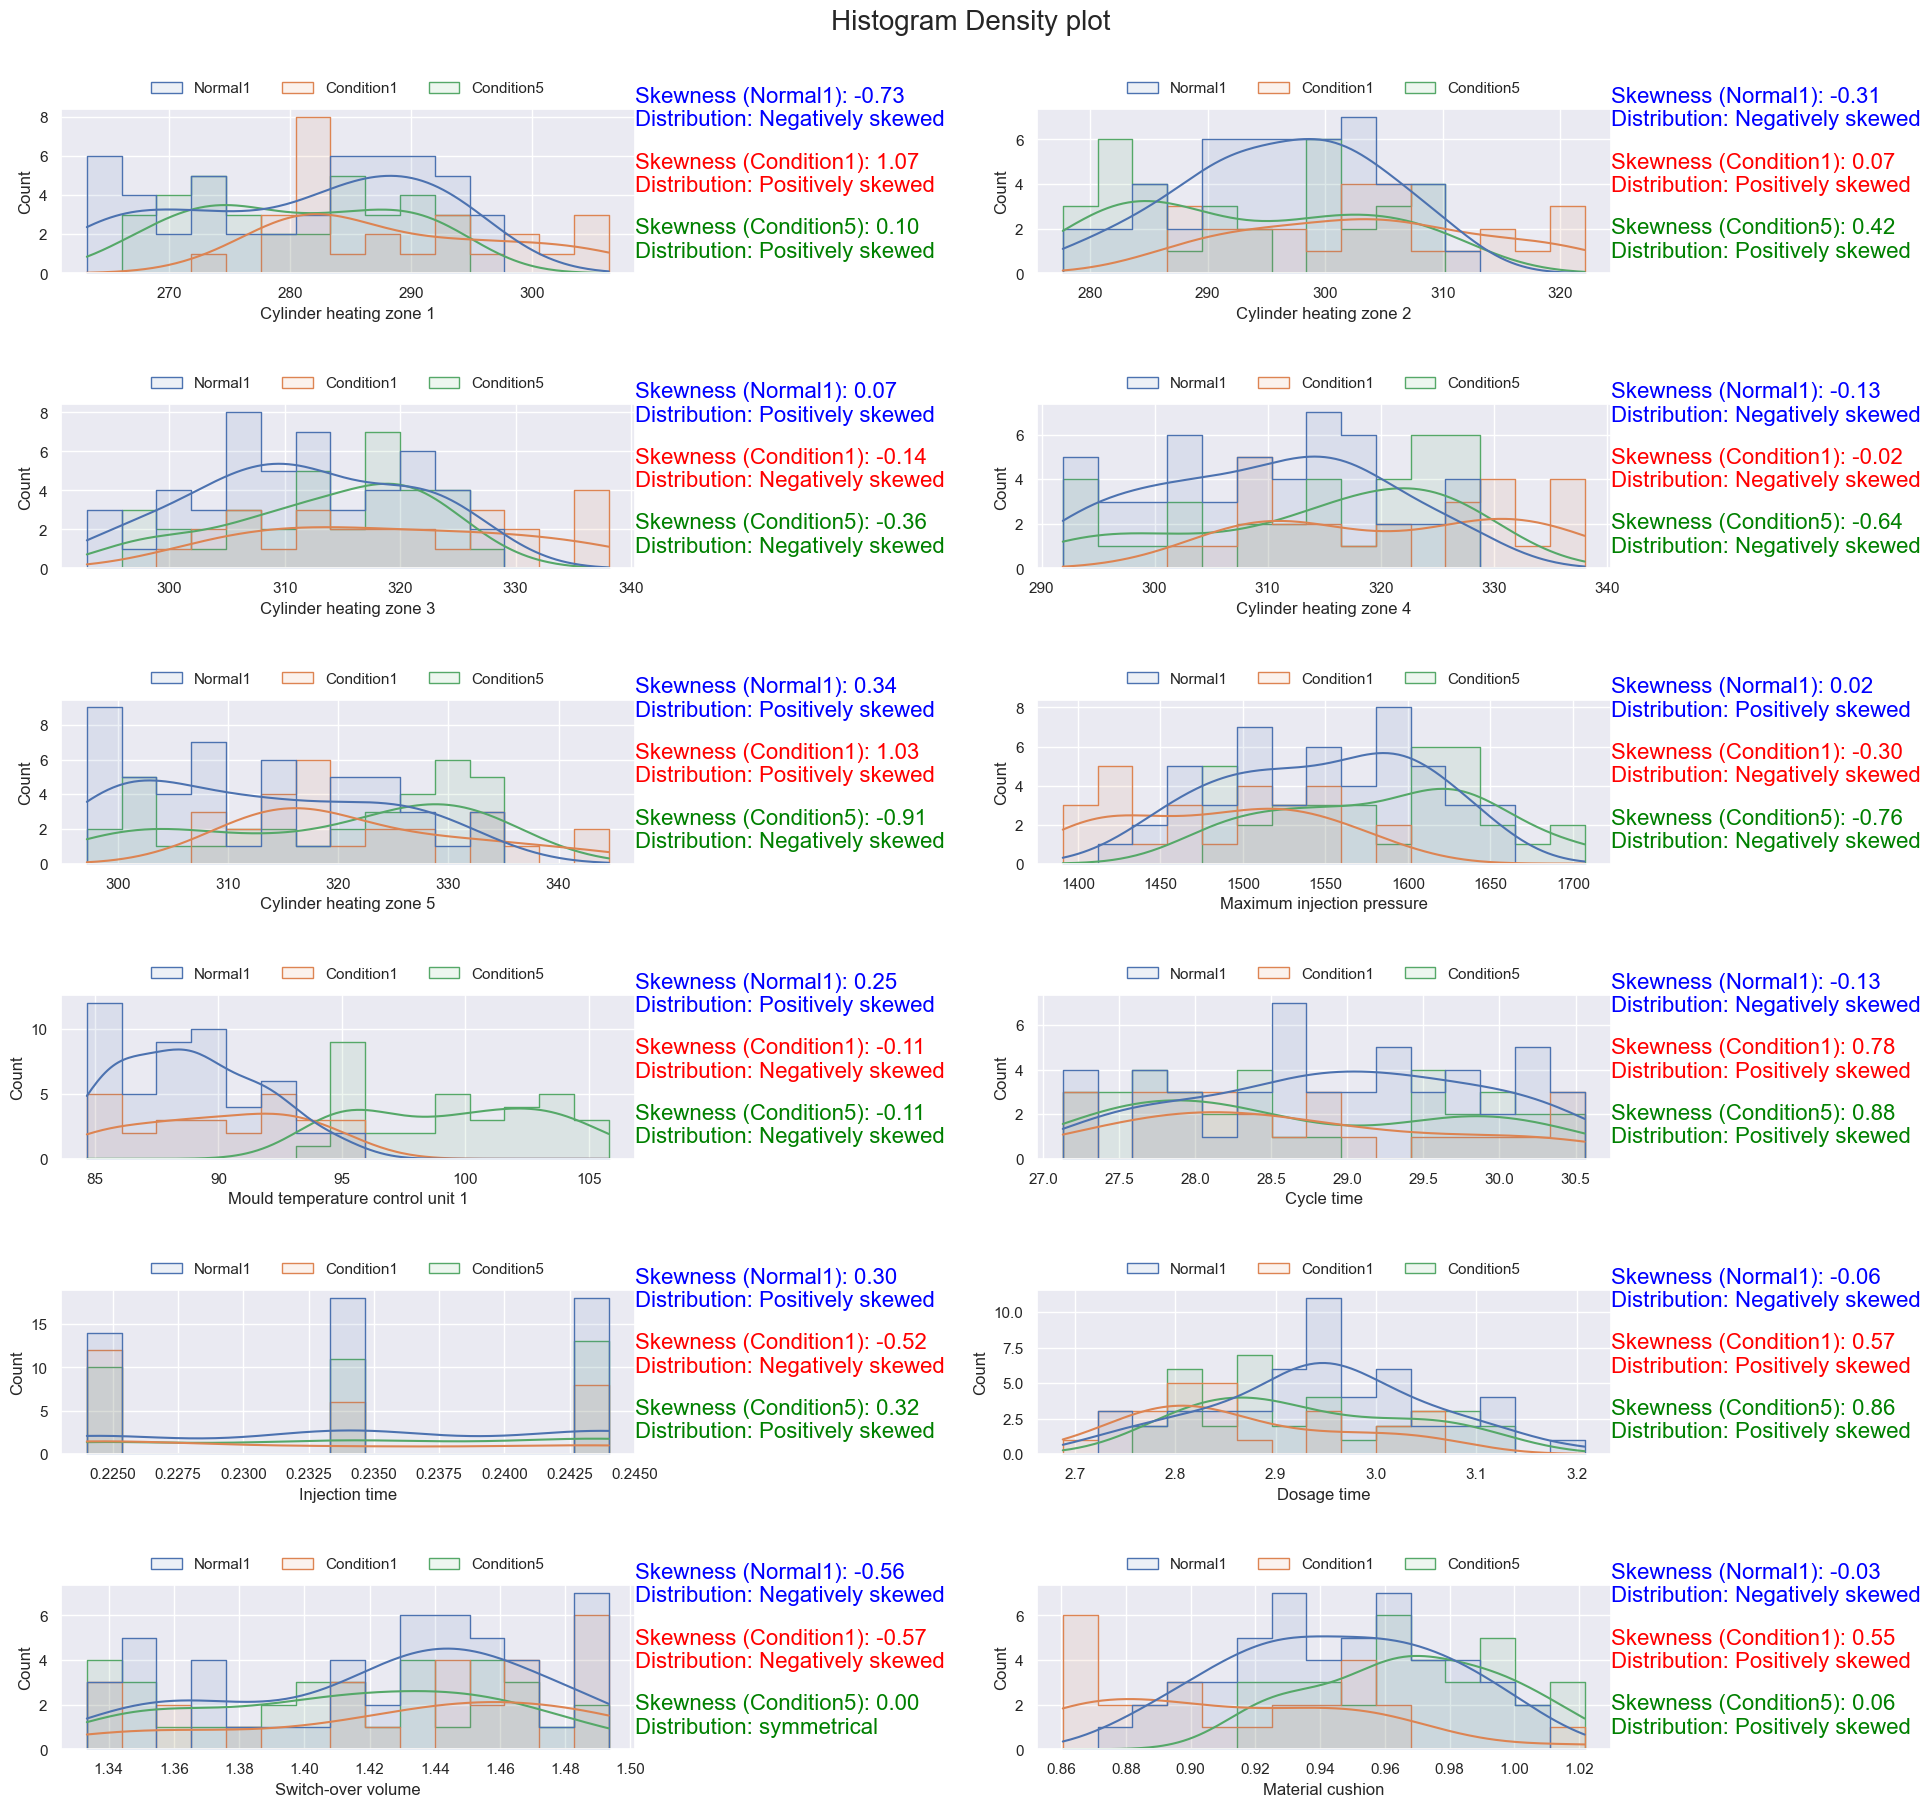

In [20]:
dfhist = pd.DataFrame(for_fill)
# Font size
sns.set(font_scale=1)

# Determine the subplot
num_rows, num_cols = 6, 2
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 20))

# Define colors for text
text_colors = ['blue', 'red', 'green']

# Calculate the Karl Pearson coefficient of skewness for each parameter in each condition
skewness_dict = {}
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        col_index = i * num_cols + j
        if col_index < len(columns):
            col = columns[col_index]

            pl = sns.histplot(ax=ax, data=dfhist, hue='Condition', stat='count', x=col, element='step', alpha=0.1, kde=True, bins=15)
            sns.move_legend(pl, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title=None, frameon=False)

            # Calculate the Karl Pearson coefficient of skewness for each condition
            for condition in dfhist['Condition'].unique():
                condition_data = dfhist[dfhist['Condition'] == condition]
                if len(condition_data) > 0:
                    skewness = 3 * (condition_data[col].mean() - condition_data[col].median()) / condition_data[col].std()
                else:
                    skewness = np.nan
                skewness_dict[(col, condition)] = skewness

# Display skewness information with spacing after every 2nd and 4th line
for i in range(num_rows):
    for j in range(num_cols):
        ax = axes[i, j]
        col_index = i * num_cols + j
        if col_index < len(columns):
            col = columns[col_index]
            text_x, text_y = 1, 0.9
            for idx, condition in enumerate(dfhist['Condition'].unique()):
                skewness_value = skewness_dict.get((col, condition), np.nan)

                # Determine skewness type
                skew_type = (
                    "Positively skewed"
                    if skewness_value > 0
                    else "Negatively skewed"
                    if skewness_value < 0
                    else "symmetrical")

                # Use different text colors based on the index
                ax.text(text_x, text_y, f'Skewness ({condition}): {skewness_value:.2f}\nDistribution: {skew_type}', transform=ax.transAxes, fontsize=16, color=text_colors[idx])

                # Add extra spacing after every 2nd and 4th line
                if (idx + 1) % 2 == 0 or (idx + 1) % 4 == 0:
                    text_y -= 0.40
                else:
                    text_y -= 0.40

plt.suptitle('Histogram Density plot', fontsize=20, x='0.58')
plt.subplots_adjust(top=0.93, hspace=0.8, wspace=0.7)
plt.show()

### Observation:
    The historgram will show us if is a positive or negative skewed for all 3 different condition.
    From our histogram, most of it is skewed. Hence, we will need to use median instead of mean.

___
<span style="color: red;">Finding the percentage different of Normal1 with Condition1 / Condition5 for the median </span> 

In [21]:
import pandas as pd

# Create a DataFrame from the data
dfmedian = pd.DataFrame(for_fill)

# Extract data for "Normal1", "Condition1", "Condition5" condition
normal1_data = dfmedian[dfmedian['Condition'] == 'Normal1'][columns]
condition1_data = dfmedian[dfmedian['Condition'] == 'Condition1'][columns]
condition5_data = dfmedian[dfmedian['Condition'] == 'Condition5'][columns]

# Median for each condition
median_n1 = normal1_data.median()
median_c1 = condition1_data.median()
median_c5 = condition5_data.median()

# Calculate percentage change
percentage_change_c1 = abs(round(((median_c1 - median_n1) / abs(median_n1)) * 100, 2))
percentage_change_c5 = abs(round(((median_c5 - median_n1) / abs(median_n1)) * 100, 2))

# Create a DataFrame for the table
table_data = {
    "Parameter": percentage_change_c1.index,
    "Normal1 to Condition1 (%)": percentage_change_c1.values,
    "Normal1 to Condition5 (%)": percentage_change_c5.values }
df_table = pd.DataFrame(table_data)

# Display the DataFrame table
df_table

Parameter  Normal1 to Condition1 (%)  \
0            Cylinder heating zone 1                       0.67   
1            Cylinder heating zone 2                       2.17   
2            Cylinder heating zone 3                       2.77   
3            Cylinder heating zone 4                       3.53   
4            Cylinder heating zone 5                       2.31   
5         Maximum injection pressure                       3.65   
6   Mould temperature control unit 1                       1.69   
7                         Cycle time                       2.19   
8                     Injection time                       0.00   
9                        Dosage time                       3.56   
10                Switch-over volume                       0.70   
11                  Material cushion                       4.36   

    Normal1 to Condition5 (%)  
0                        1.15  
1                        1.67  
2                        1.07  
3                        2.11  
4                        3.81  
5                        3.53  
6                       12.40  
7                        2.16  
8                        0.00  
9                        1.66  
10                       1.40  
11                       2.32

### Observation:
    By setting our threshold of 3%, we can see this are the parameter that is more than our threshold:
    
    Normal1 to Condition1: Cylinder heating zone 4, Maximum injection pressure, Dosage time and Material cushion.
    Normal1 to Condition5: Cylinder heating zone 5, Maximum injection pressure and Mould temperature control unit 1.

___

<span style="color: red;">Pair plot</span> 

<Figure size 3000x3000 with 0 Axes>

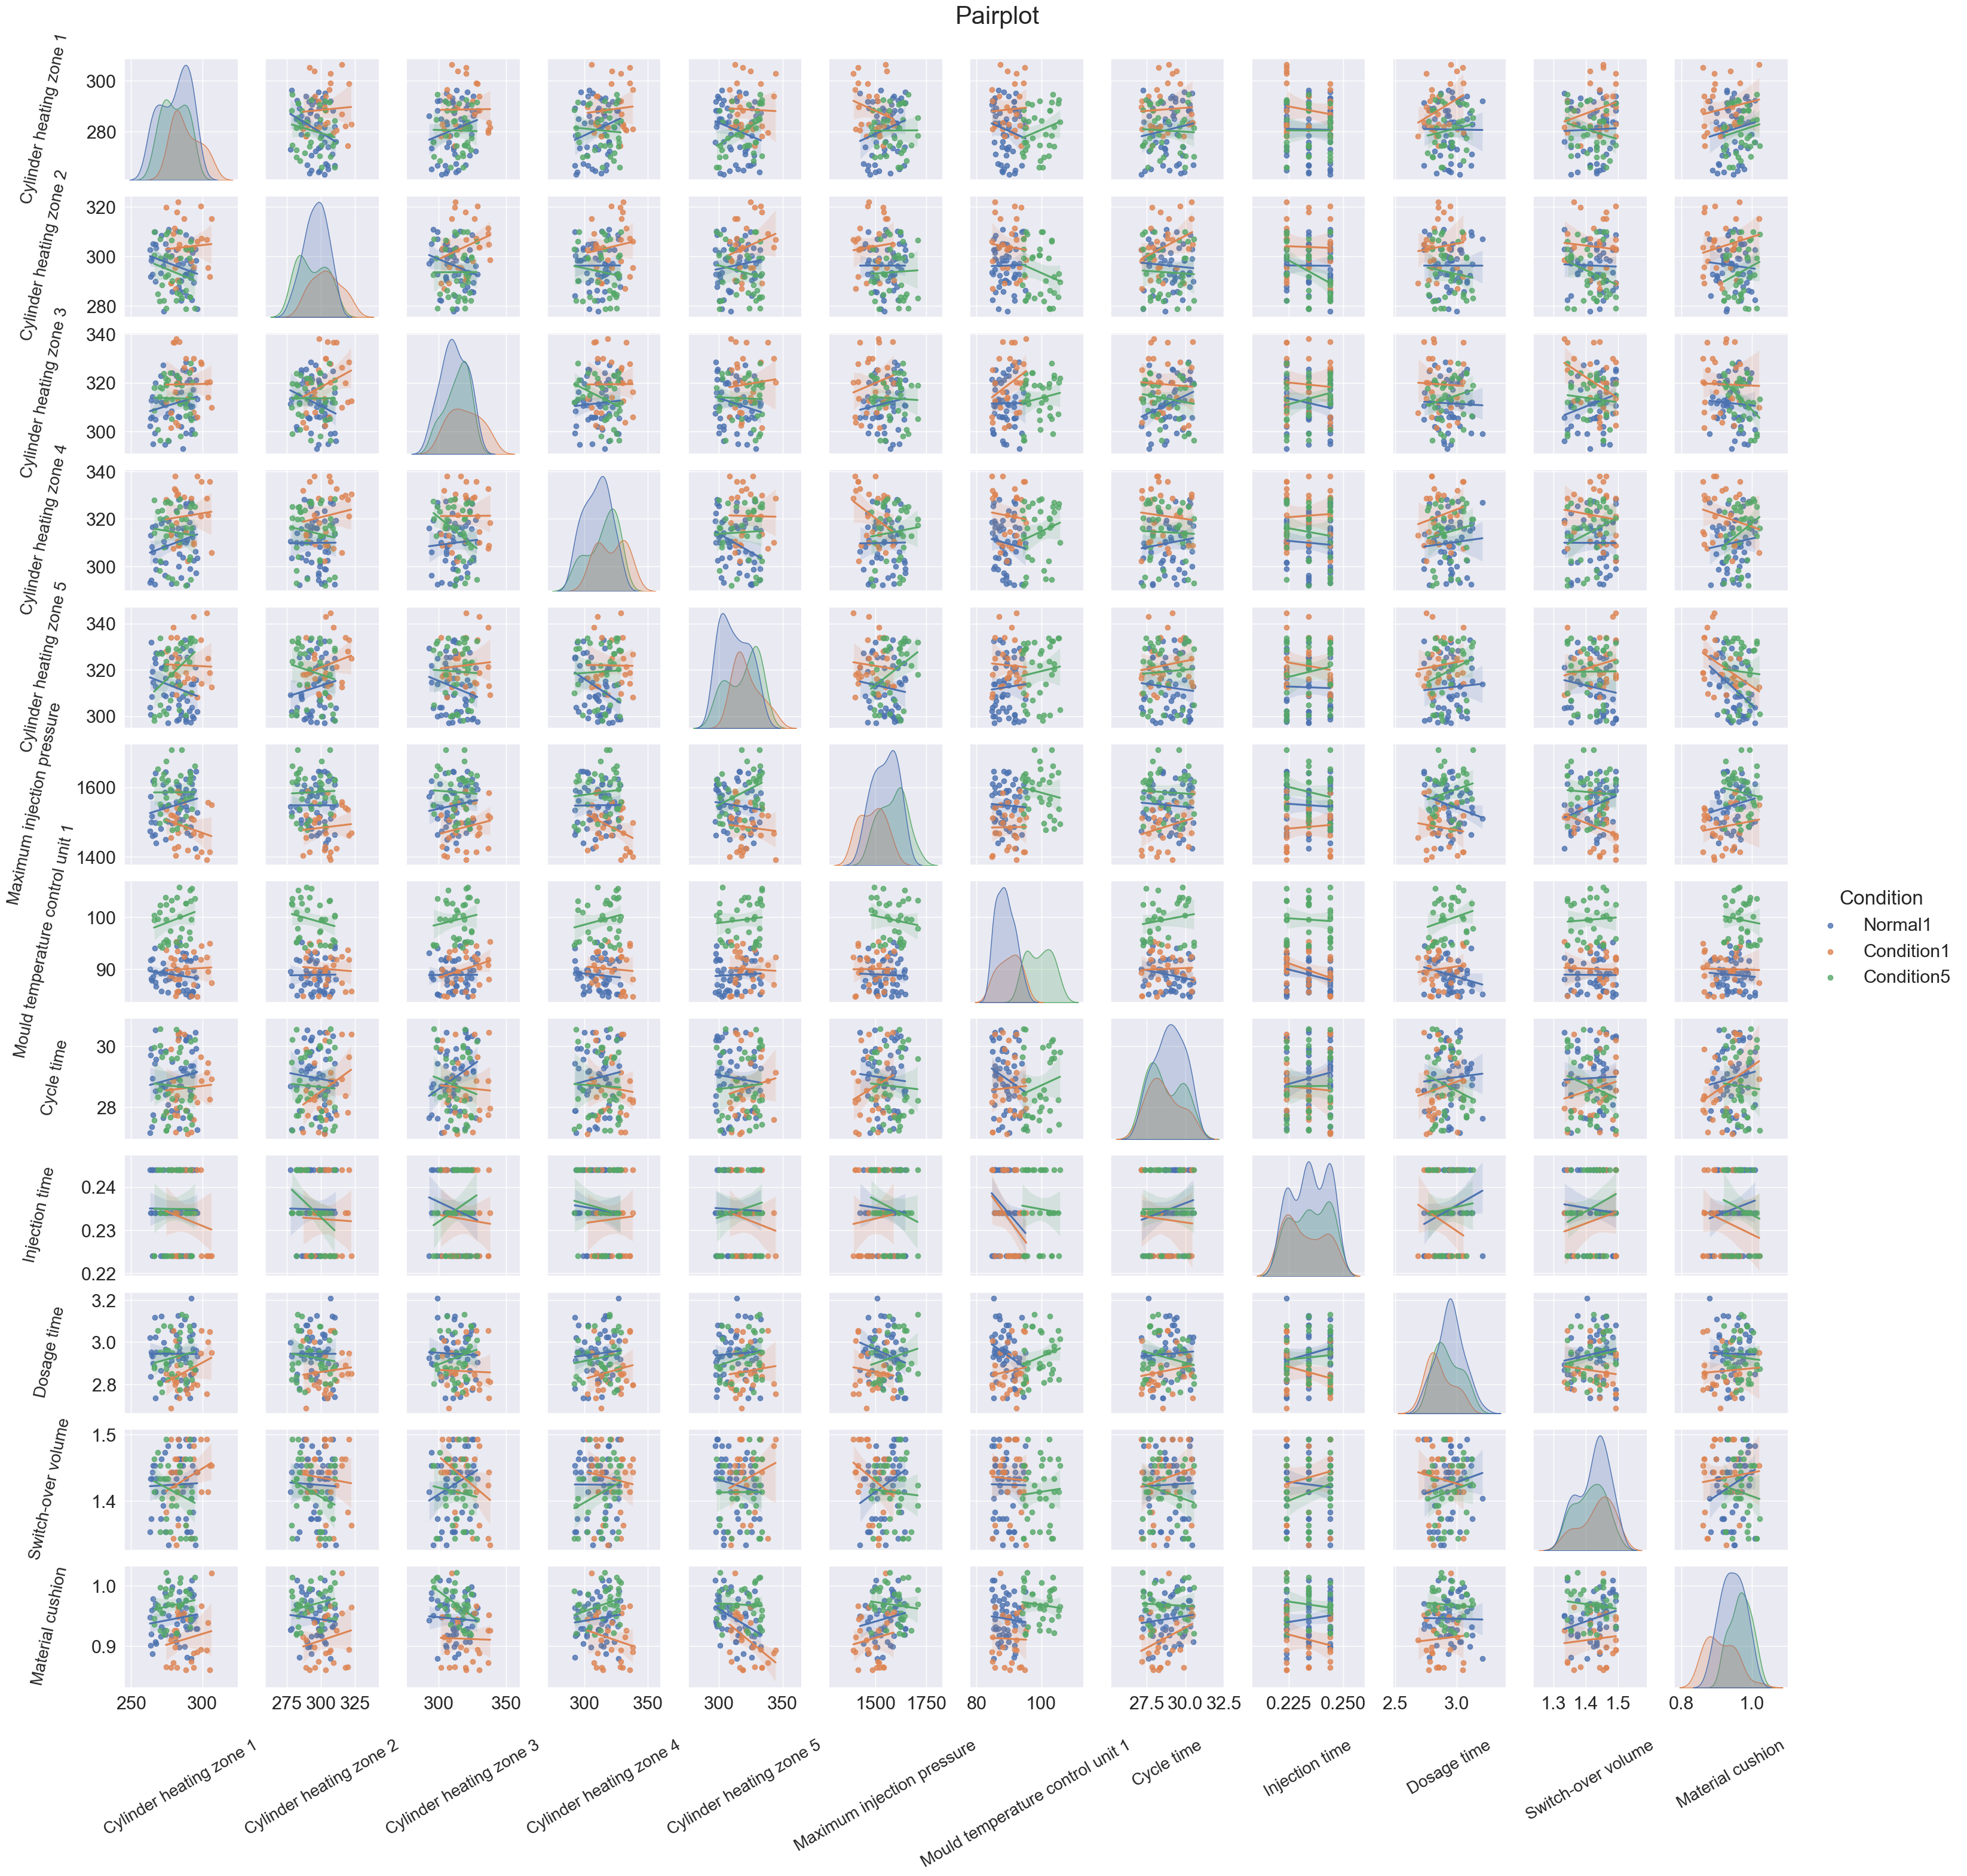

In [22]:
sns.set(font_scale = 2)
plt.figure(figsize = (30, 30))
pairplott = sns.pairplot(for_fill, hue = "Condition", kind = "reg")

# Increase x and y label font size
for ax in pairplott.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize = 20, rotation = 30)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 20, rotation = 78)

# Increase space for y-labels
for ax in pairplott.axes[:, 0]:  # Only the leftmost axes (y-labels)
    ax.yaxis.labelpad = 40  # Increase the space for y-labels

# Increase space for x-labels
for ax in pairplott.axes[-1, :]:  # Only the bottommost axes (x-labels)
    ax.xaxis.labelpad = 30  # Increase the space for x-labels

plt.suptitle('Pairplot', fontsize = 30)
plt.subplots_adjust(top = 0.95)
plt.show()

### Observation:
    Base on this pair plot, it shows the relationship between parameters and parameters. Some parameters have impact on the conditions which are:
    
    Normal1 to Condition1: Cylinder heating zone 4, Dosage time and Material Cushion.
    Normal1 to Condition5: Cylinder heating zone 5, Mould temperature control unit 1 and Maximum injection pressure.

___
<span style="color: red;">Line Chart for all 12 parameters</span> 

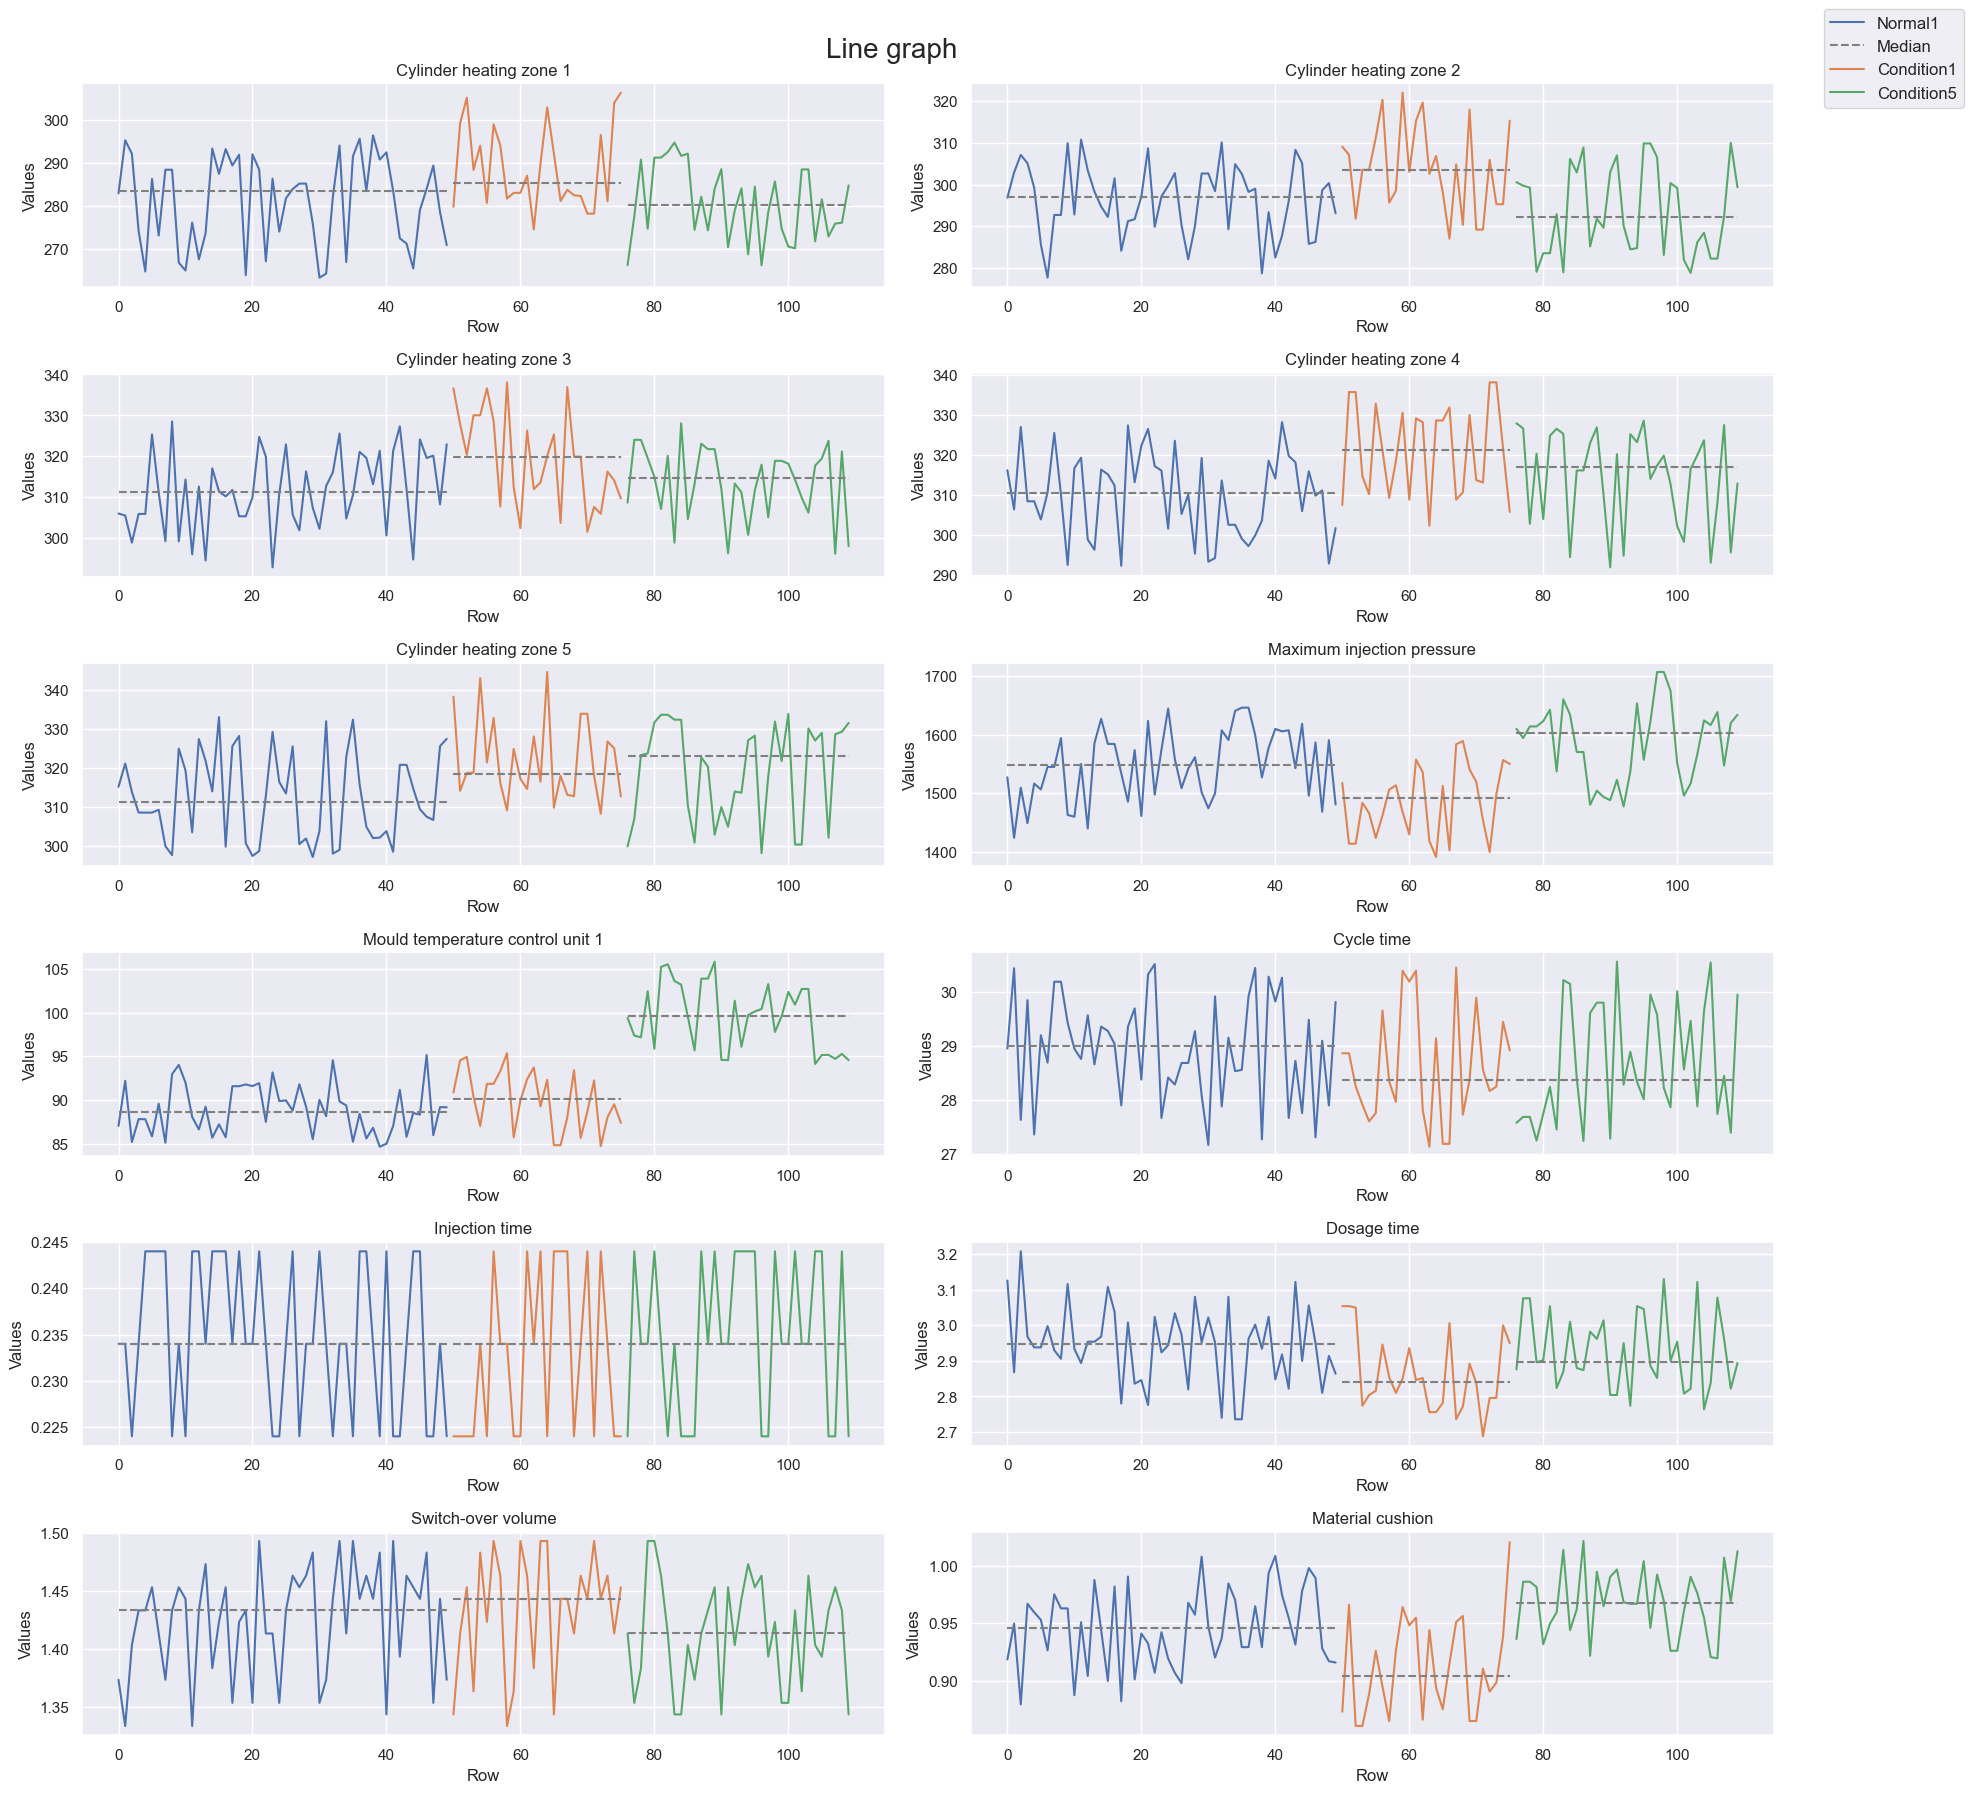

In [23]:
# Line chart
dfline = pd.DataFrame(for_fill)
sns.set(font_scale=1)

# Function to plot data for a specific column
def plot_column(ax, df, column_name, label):
    grouped = dfline.groupby('Condition')
    condition_data = {}
    ctr = 0
    for condition1, group in grouped:
        condition_data[condition1] = group
        ax.plot(condition_data[condition1].index, condition_data[condition1][column_name], label=condition1)
        
        # Calculate and plot the median line for each condition
        median_line = [condition_data[condition1][column_name].median()] * len(condition_data[condition1].index)
        if ctr == 0:
            ax.plot(condition_data[condition1].index, median_line, linestyle='--', color='gray', label='Median')
            ctr =+1
        else:
            ax.plot(condition_data[condition1].index, median_line, linestyle='--', color='gray')

    ax.set_xlabel('Row')
    ax.set_ylabel('Values')
    ax.set_title(column_name)
    if label:
        ax.legend()

# List of column names you want to plot
columns_to_plot = columns

# Create a 6x2 subplot grid
num_rows = 6
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize=(18, 18))

# Flatten the axs array so that we can iterate over it easily
axs = axs.ravel()

# Call the function for each column and assign it to a subplot
for i, column in enumerate(columns_to_plot):
    if i < num_rows * num_cols:
        plot_column(axs[i], forfill, column, label=0)
        if i == 0:
            fig.legend(loc='upper right', bbox_to_anchor=(1.1, 1), prop={'size': 12})

plt.suptitle("Line graph", fontsize=20)
plt.tight_layout()
plt.show()

### Observation 

        From the Line Chart with 12 parameter we can determine those threshold below 3% we mostly overlapped by Normal 1. On top of it, the median line has close to 0% comparison between the conditions. 

___
<span style="color: red;">Line Chart for top 6 parameters</span> 

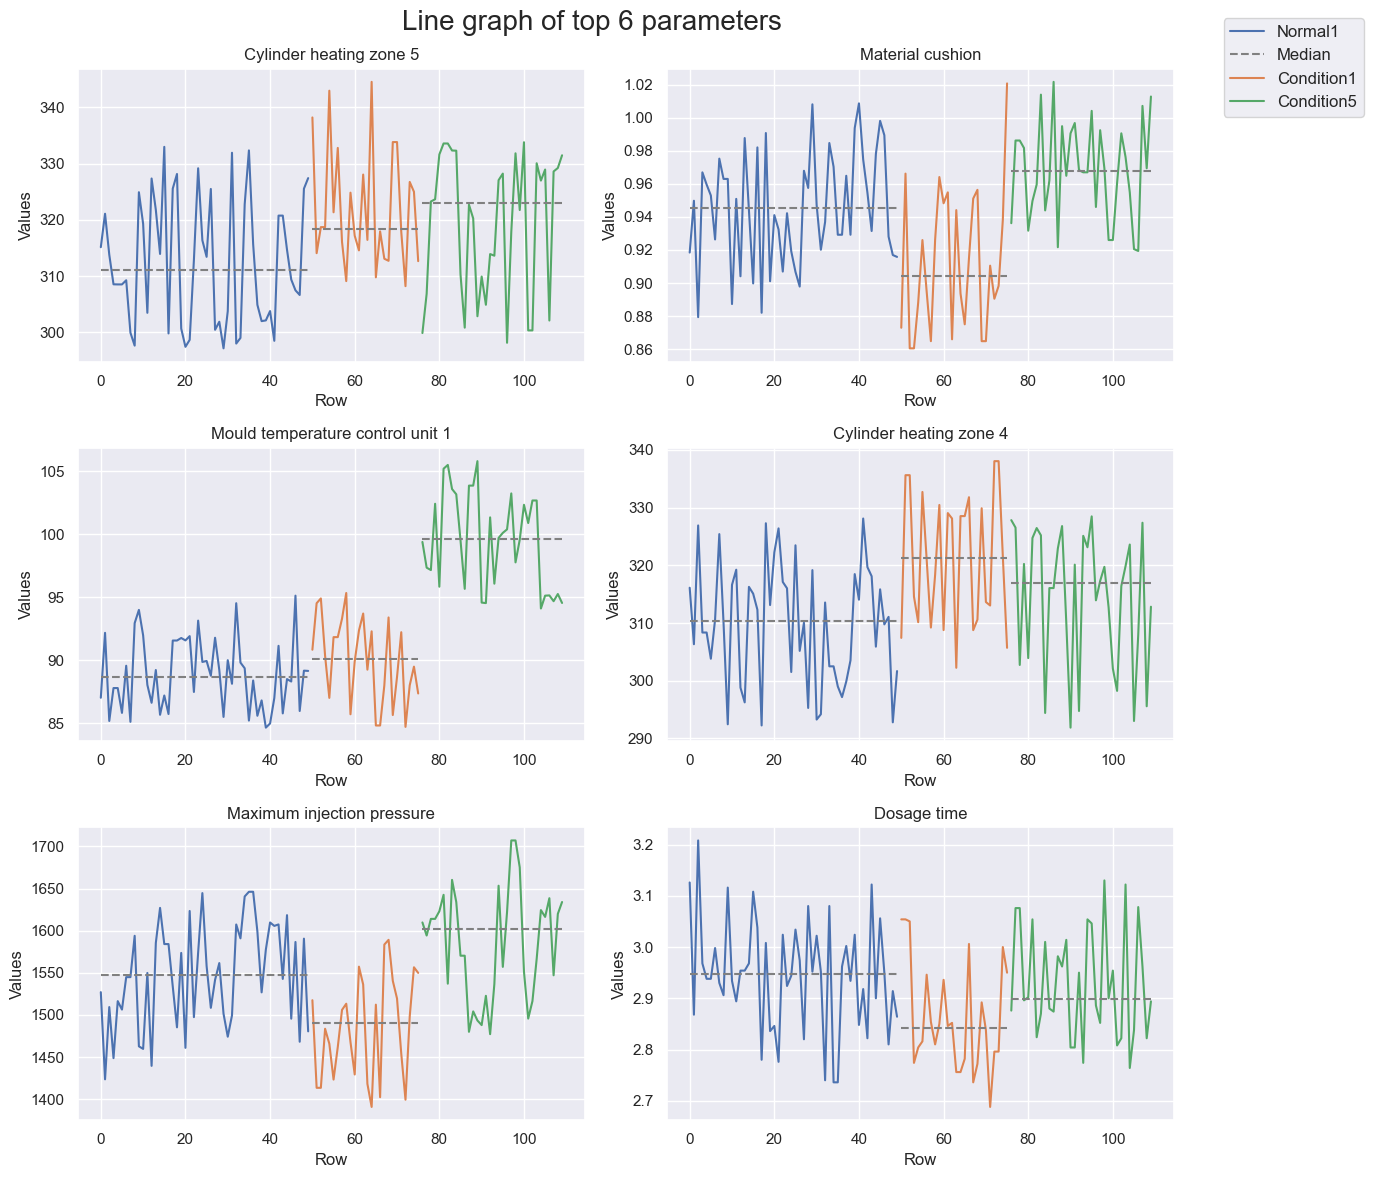

In [24]:
# Line chart
sns.set(font_scale=1)

dfline = pd.DataFrame(for_fill)

def plot_column(ax, df, column_name, label):
    grouped = dfline.groupby('Condition')
    condition_data = {}
    # Counter to display the median label on the legend once
    ctr = 0

    for condition1, group in grouped:
        condition_data[condition1] = group
        ax.plot(condition_data[condition1].index, condition_data[condition1][column_name], label=condition1)
        
        # Calculate and plot the median line for each condition
        median_line = [condition_data[condition1][column_name].median()] * len(condition_data[condition1].index)
        if ctr == 0:
            ax.plot(condition_data[condition1].index, median_line, linestyle='--', color='gray', label='Median')
            ctr =+1
        else:
            ax.plot(condition_data[condition1].index, median_line, linestyle='--', color='gray')
            

    ax.set_xlabel('Row')
    ax.set_ylabel('Values')
    ax.set_title(column_name)
    if label:
        ax.legend()

# Filter columns with a percentage change of 3% or above
significant_columns_c1 = [col for col in percentage_change_c1.index if percentage_change_c1[col] >= 3]
significant_columns_c5 = [col for col in percentage_change_c5.index if percentage_change_c5[col] >= 3]

# Create a set of unique significant columns to remove any duplicates
unique_significant_columns = set(significant_columns_c1 + significant_columns_c5)

# Create subplots for significant columns
num_rows = 3
num_cols = 2
fig, axs = plt.subplots(num_rows, num_cols, figsize = (12, 12))

axs = axs.ravel()

for i, column in enumerate(unique_significant_columns):
    if i < num_rows * num_cols:  # Display 3x2 subplots 
        plot_column(axs[i], forfill, column, label = 0)
        if i == 0:
            fig.legend(bbox_to_anchor = (1.15, 0.98), prop = {'size': 12})

plt.suptitle("Line graph of top 6 parameters", fontsize = 20)
plt.subplots_adjust(top = 2)
plt.tight_layout()
plt.show()

### Observation:
    Based on the line graph of all 12 parameters, we reduce it to top 6 base on the pairplot and threshold. 
    
    From this line graph, the more significant effect on the conditions are:
    Normal1 to Condition1: Cylinder heating zone 4, Material Cushion and Maximum injection pressure.
    Normal1 to Condition5: Cylinder heating zone 5, Mould temperature control unit 1.

___
<span style="color: red;">Correlation Analysis for Top Parameter</span> <br>

In [25]:
# Replace string to number
dataframenew1 = for_fill.replace('Normal1', 0).replace('Condition1', 1).replace('Condition5', 2)

# Replace Condition - Category to integer
dataframenew1['Condition'] = dataframenew1['Condition'].astype('int64')

# Calculate the correlation and sort values
corr_values = abs(dataframenew1.corr()['Condition']).sort_values(ascending=0)

# Create a DataFrame from the correlation values
corr_df = pd.DataFrame({'Feature': corr_values.index, 'Correlation': corr_values.values})
corr_df = corr_df.iloc[1:]
display(corr_df)

Feature  Correlation
1   Mould temperature control unit 1     0.770190
2            Cylinder heating zone 5     0.264772
3                   Material cushion     0.202276
4            Cylinder heating zone 4     0.195379
5         Maximum injection pressure     0.181182
6                         Cycle time     0.119465
7            Cylinder heating zone 3     0.114261
8                        Dosage time     0.091194
9                 Switch-over volume     0.089220
10           Cylinder heating zone 2     0.077315
11           Cylinder heating zone 1     0.013379
12                    Injection time     0.007206

### Observation
    Our top 4 parameters are 'Mould temperature control unit 1', 'Cylinder heating zone 5', 'Material cushion' and 'Cylinder heating zone 4'.

___
<span style="color: red;">Correlation Analysis for the dataset</span> <br>

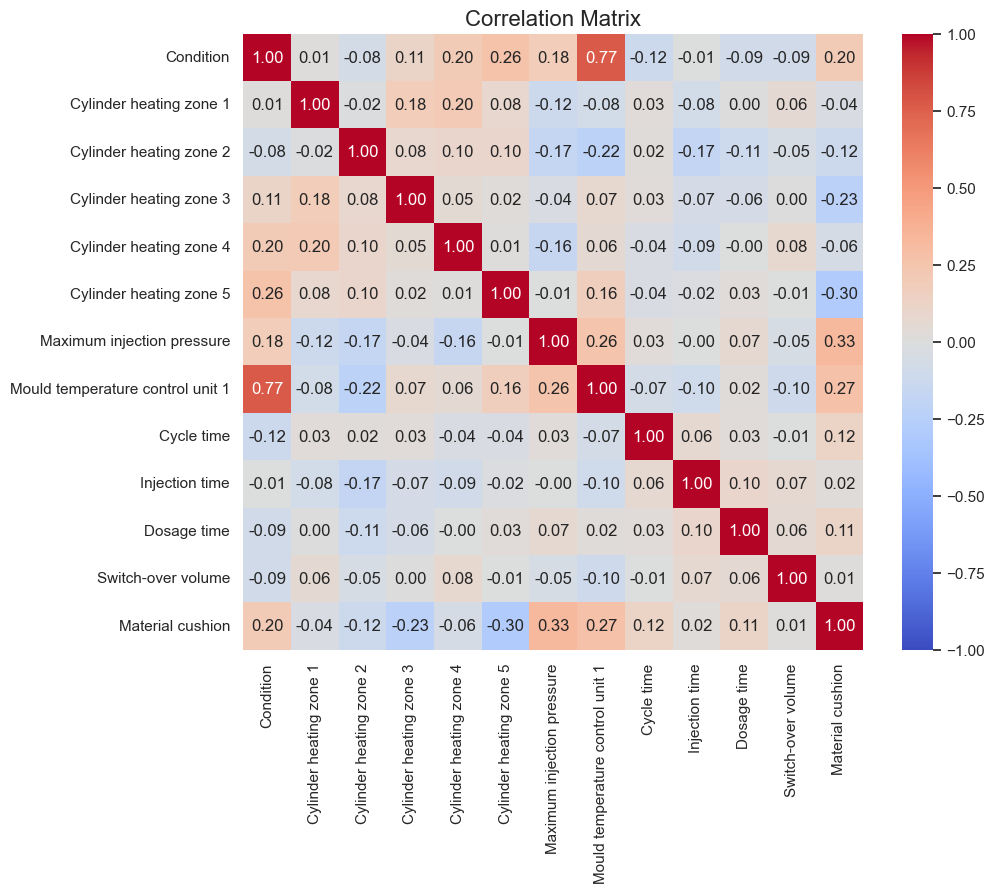

In [26]:
#Correlation for the dataset
correlation_matrix = dataframenew1.corr()

#Figure size 
plt.figure(figsize = (10, 8))

#create a heatmat and right hand side is the stronger relationship
heatmap = sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = '.2f')

#Rotate the x axis word else all will overlap 
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90)
heatmap.set_yticklabels(heatmap.get_yticklabels())
plt.title('Correlation Matrix', fontsize = 16)
plt.show()

### Observation:
    From the heatmap, the parameter that have highly positive correlation to the conditions is 'Mould temperature control unit 1'. While the other parameter are 'Cylinder heating zone 4, Cylinder heating zone 5, Material Cushion' are within the top4 range. However they are not correlated as they fall within the value of -0.33 to 0.33.
        

___
<span style="color: red;">Pair Plot</span> <br>

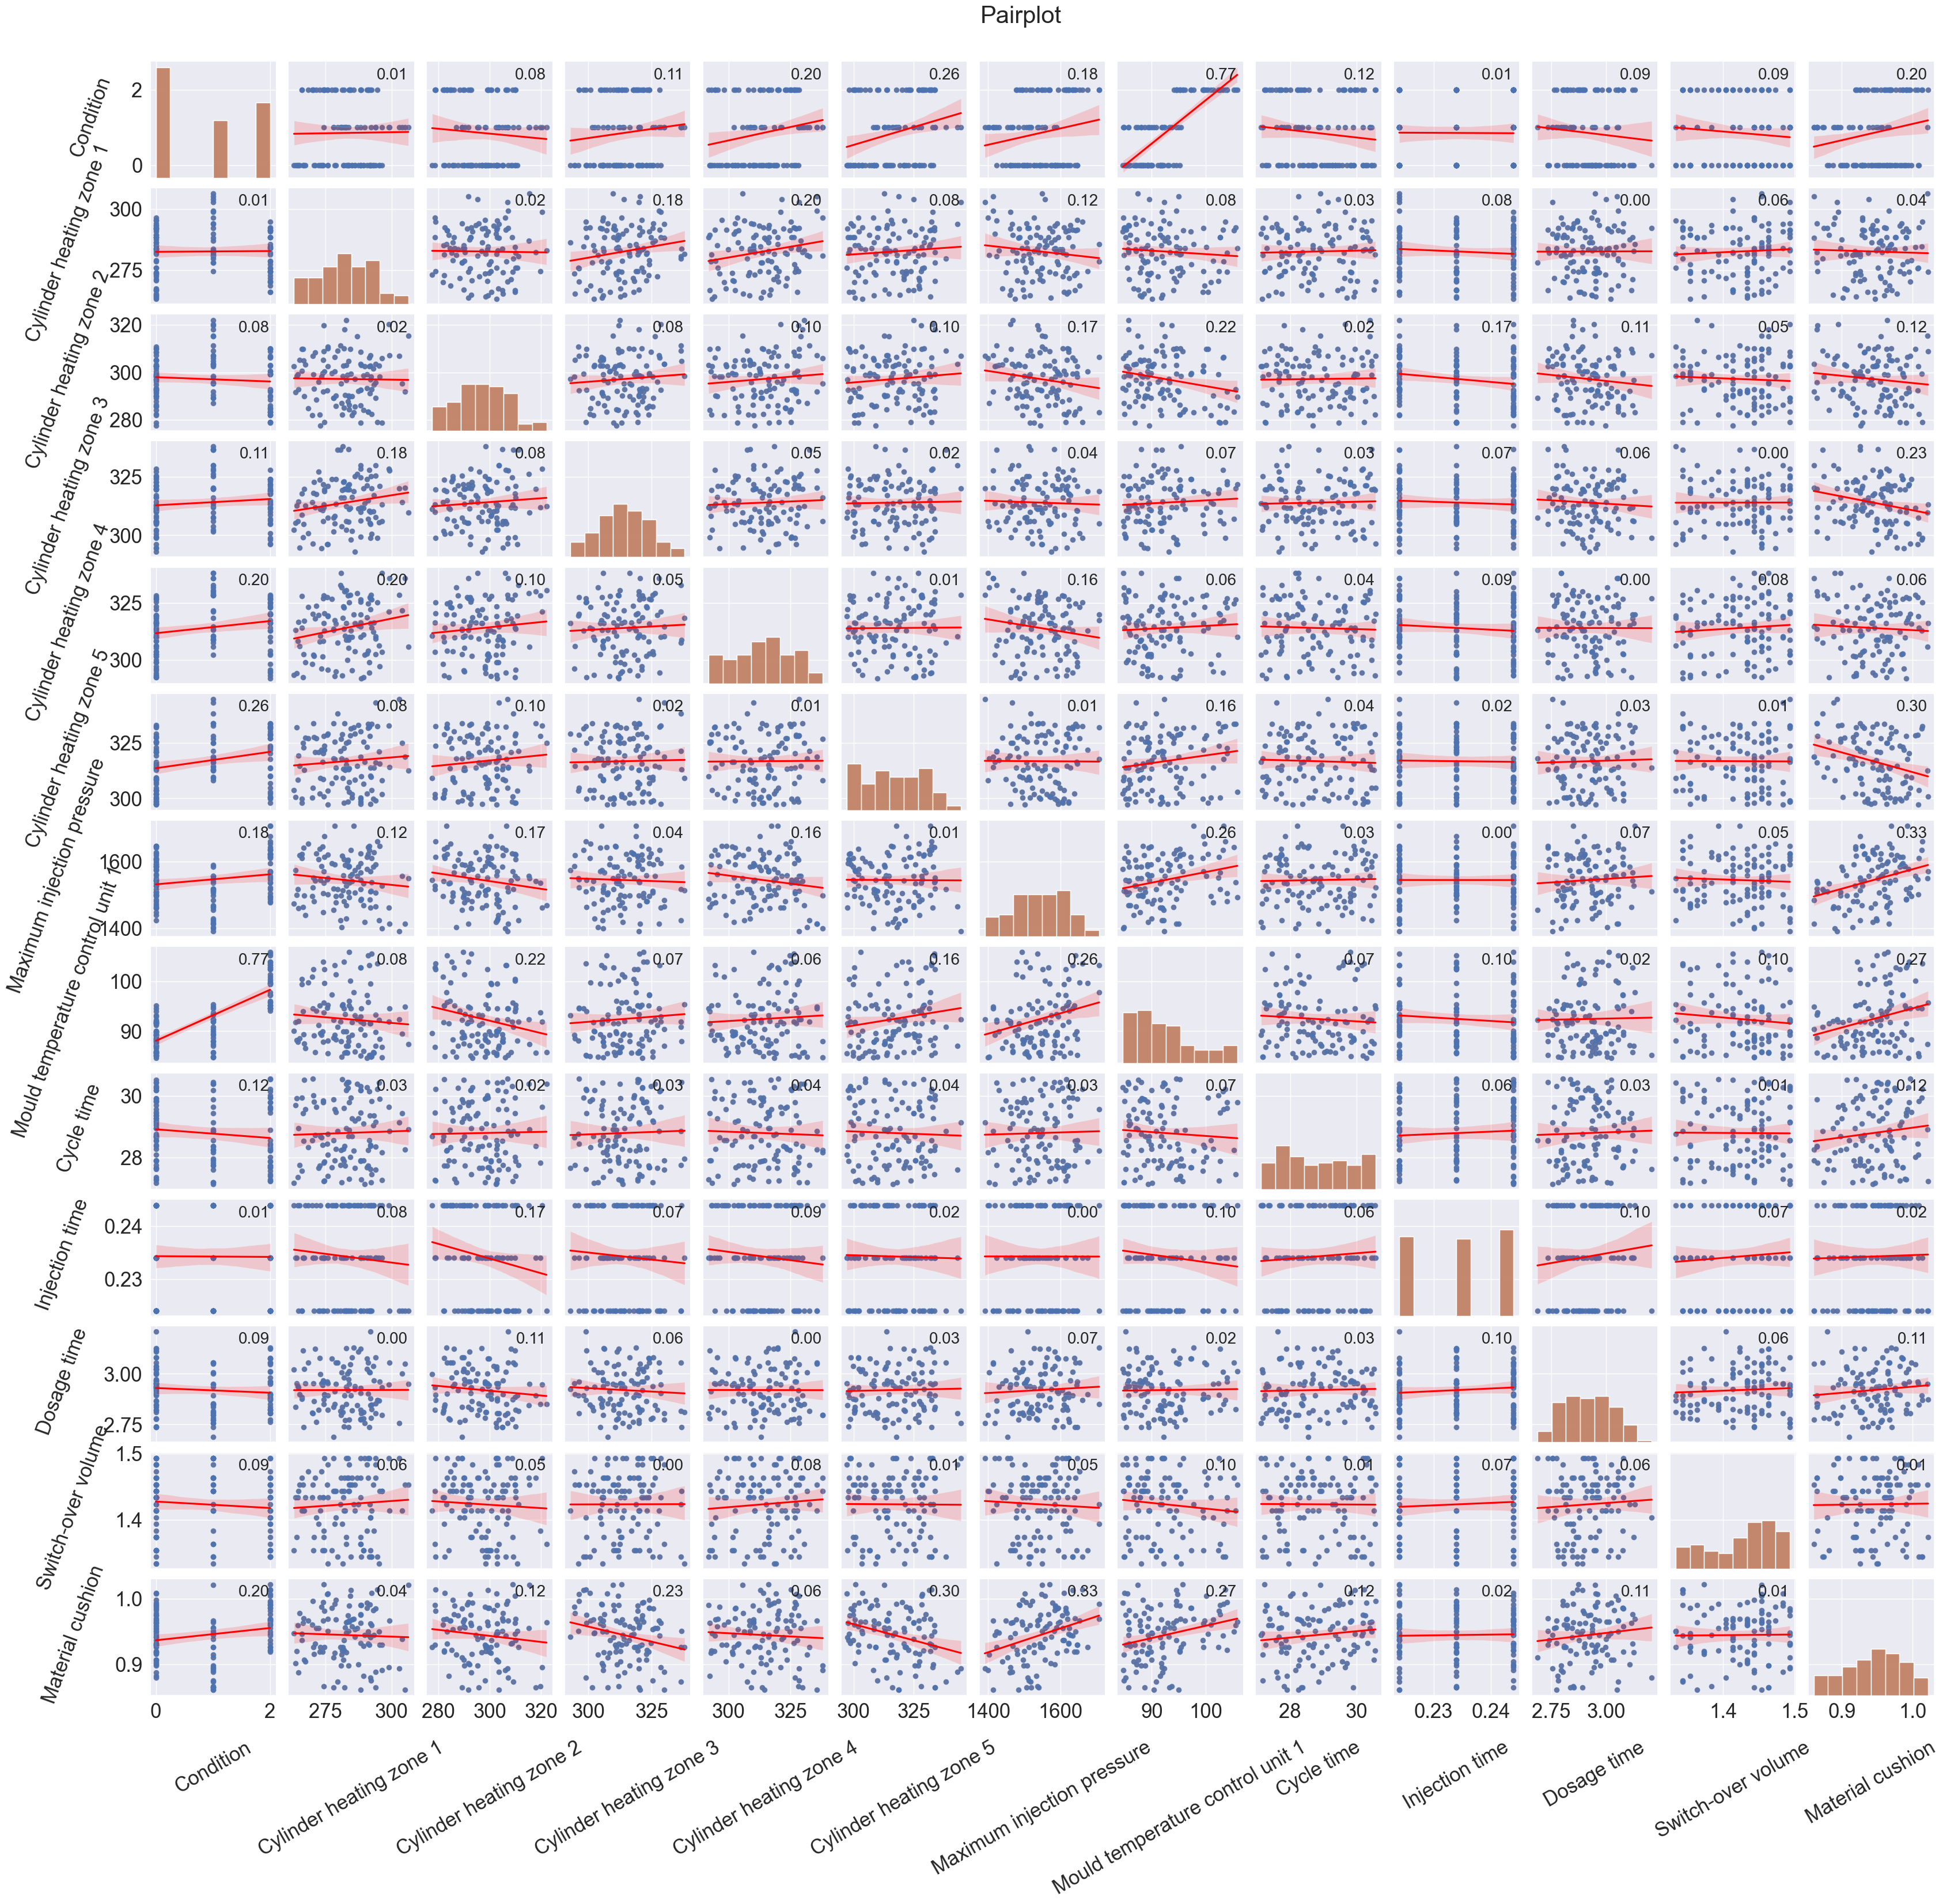

In [27]:
# Create pairplot
g = sns.pairplot(dataframenew1, height = 2.5)

# Create upper and lower (Exclude diagonal) for scatterplot
# Diagonal for histogram
g.map_upper(sns.scatterplot)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)

# Add regression line in red
g.map_upper(sns.regplot, line_kws={'color': 'red'})
g.map_lower(sns.regplot, line_kws={'color': 'red'})

# Calculate the correlation matrix
corr_matrix = dataframenew1.corr()

for i, (ax_row, corr) in enumerate(zip(g.axes, corr_matrix.values)):
    for j, (ax, corr_value) in enumerate(zip(ax_row, corr)):
        if i != j:
            corr_abs = abs(corr_value)
            ax.annotate(f"{corr_abs:.2f}", (0.95, 0.95), xycoords = 'axes fraction', ha = 'right', va = 'top', fontsize = 20)

# Increase x and y label font size
for ax in g.axes.flat:
    ax.set_xlabel(ax.get_xlabel(), fontsize = 25, rotation = 30)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 25, rotation = 70)

# Increase space for y-labels
for ax in g.axes[:, 0]:  # Only the leftmost axes (y-labels)
    ax.yaxis.labelpad = 40  # Increase the space for y-labels

# Increase space for x-labels
for ax in g.axes[-1, :]:  # Only the bottommost axes (x-labels)
    ax.xaxis.labelpad = 20  # Increase the space for x-labels

# Increase font size of subplot axis numbers
for ax in g.axes.flat:
    ax.tick_params(axis='both', labelsize = 25)
    
# Add a title to the plot
plt.suptitle('Pairplot', fontsize = 30, y = 0.93) 
plt.subplots_adjust(top = 0.9)
plt.show()

### Observation:
    Based on this pair plot, it is another method to support our findings for our top 4 parameters.

___
<span style="color: red;">Top 4 parameters heatmap</span> <br>

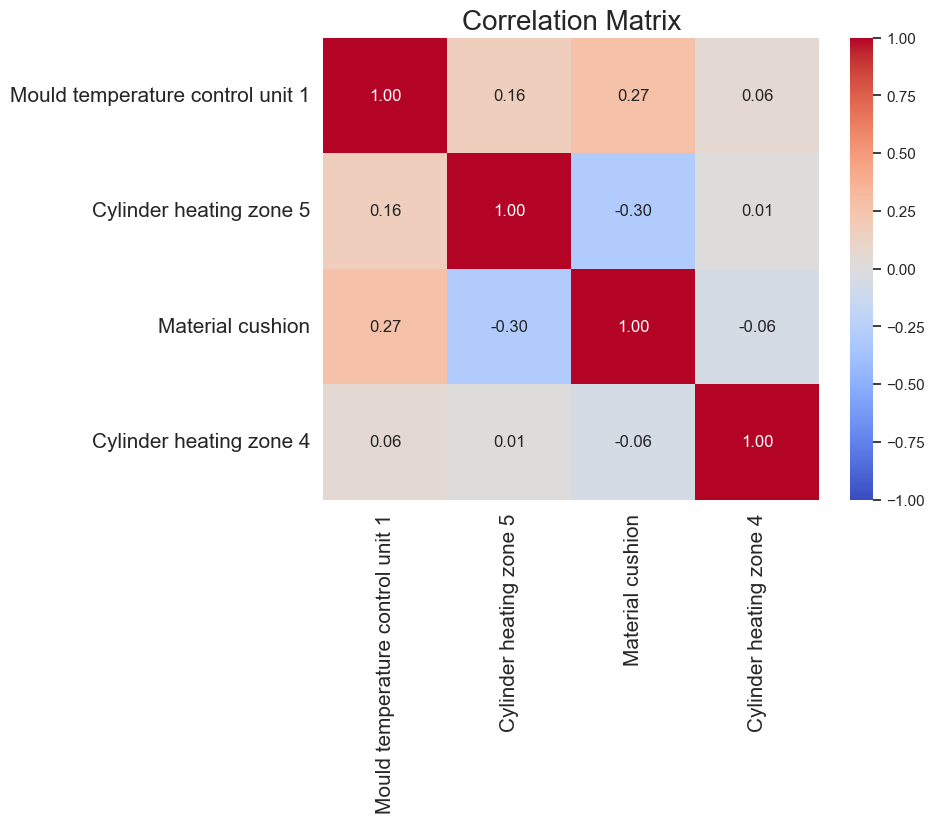

In [28]:
# Zoom into the top 4 parameters
selected_columns = ["Mould temperature control unit 1", "Cylinder heating zone 5", 'Material cushion', "Cylinder heating zone 4"]
subset_correlation = dataframenew1[selected_columns].corr()

# Create a smaller figure
plt.figure(figsize = (8, 6))

# Create a heatmap
heatmap = sns.heatmap(subset_correlation, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt = '.2f')

# Rotate the x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation = 90, fontsize = 15)  # Adjust the fontsize

# Rotate the y-axis labels
heatmap.set_yticklabels(heatmap.get_yticklabels(), fontsize = 15)  # Adjust the fontsize

# Set the title
plt.title('Correlation Matrix', fontsize = 20)  # Adjust the fontsize

# Show the plot
plt.show()


### Observation:
    Based on this heatmap, we are unable to narrow down even further because the highest value is 0.30. According to the rough rule of time, the variables are not correlated. Hence, we must observe all top 4 parameters, which are Mould temperature control unit 1, Cylinder heating zone 5, Material Cushion and Cylinder heating zone 4.